In [1]:
import pandas as pd 
import requests as rq
import numpy as np
import collections

In [2]:
#matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib as mlp
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib import rcParams

In [3]:
#getting the speech from the url
website_url = rq.get('https://lopezobrador.org.mx/2020/09/01/discurso-del-presidente-andres-manuel-lopez-obrador-en-su-segundo-informe-de-gobierno/').text

In [4]:
from bs4 import BeautifulSoup 
soup = BeautifulSoup(website_url, "lxml")

In [5]:
#retriving text from "p" founds
data = [element.text for element in soup.find_all("p")]
#convert tu string
data = str(data)
data

"['2020, Año de Leona Vicario, Benemérita Madre de la Patria', 'Amigas, amigos:', 'Fui de los primeros en sostener que el principal problema de México era la corrupción, y ahora no tengo la menor duda: la peste de la corrupción originó la crisis de México. Por eso me he propuesto erradicarla por completo y estoy convencido de que, en estos tiempos más que en otros, transformar es moralizar.', 'Este gobierno no será recordado por corrupto. Nuestro principal legado será purificar la vida pública de México. Y estamos avanzando: no hemos emprendido persecuciones facciosas ni venganzas políticas, pero tampoco encubrimos a nadie ni permitimos la impunidad. Ya se acabó la robadera de los de arriba pero todavía falta desterrar por completo el bandidaje oficial.', 'La austeridad republicana es una realidad. Son hechos, no palabras. Ya no hay lujos en el gobierno y todo lo que se ahorra se destina a conseguir el bienestar del pueblo. Según cálculos oficiales, por no permitir la corrupción y por 

In [6]:
#words that we want to ignore
from stop_words import get_stop_words
#spanish stop words
stop_words_es = get_stop_words('es')

In [7]:
from wordcloud import WordCloud, STOPWORDS

stop_words_es

['a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

In [8]:
stop_words = ["año", "mil", "pesos", "ciento", "millones", "tres", "ustedes"] + stop_words_es

amlo_wc = WordCloud(
    background_color = 'white',
    max_words = len(data),
    stopwords = stop_words
)
#generate wordcloud
amlo_wc.generate(data)

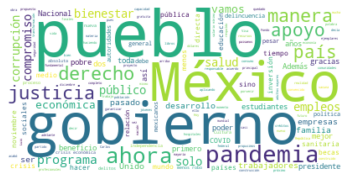

In [9]:
#display the WordCloud
plt.imshow(amlo_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

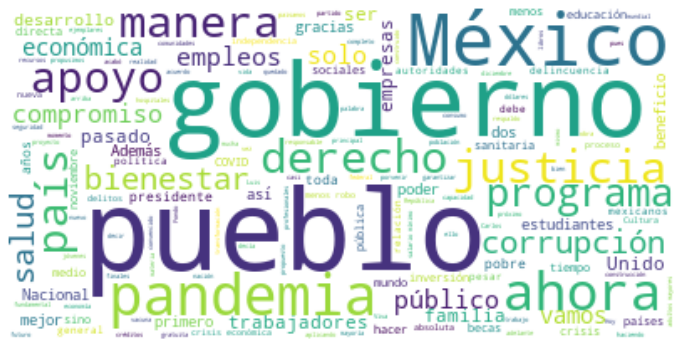

In [10]:
#re generate the word cloud
amlo_wc.generate(data)

#display the cloud
fig = plt.figure()
#set width
fig.set_figwidth(12)
#set height
fig.set_figheight(16)

plt.imshow(amlo_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

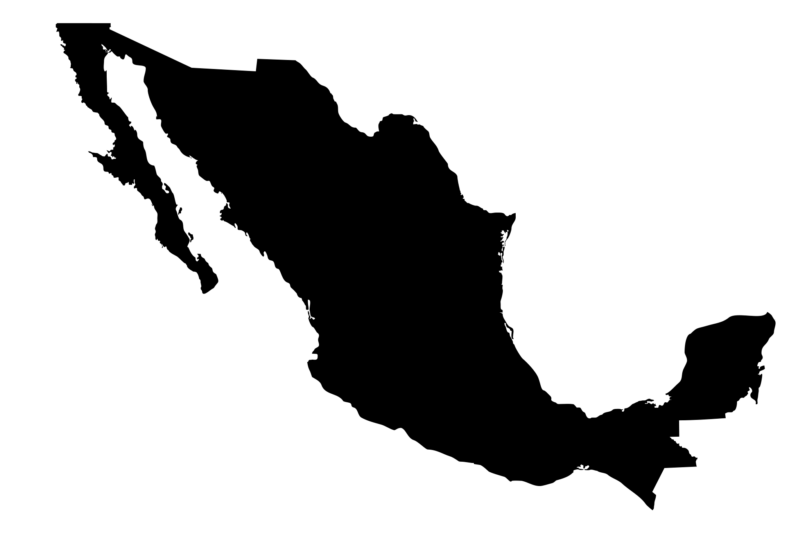

In [11]:
#select from mi local disk the mask that I will use 

mx_mask = np.array(Image.open('mx-map.png'))

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(mx_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
#mount the wordcloud generated before over the mask that I selected
amlo_wc_mx = WordCloud(background_color='white', max_words=len(data), mask=mx_mask, stopwords=stop_words)

amlo_wc_mx.generate(data)

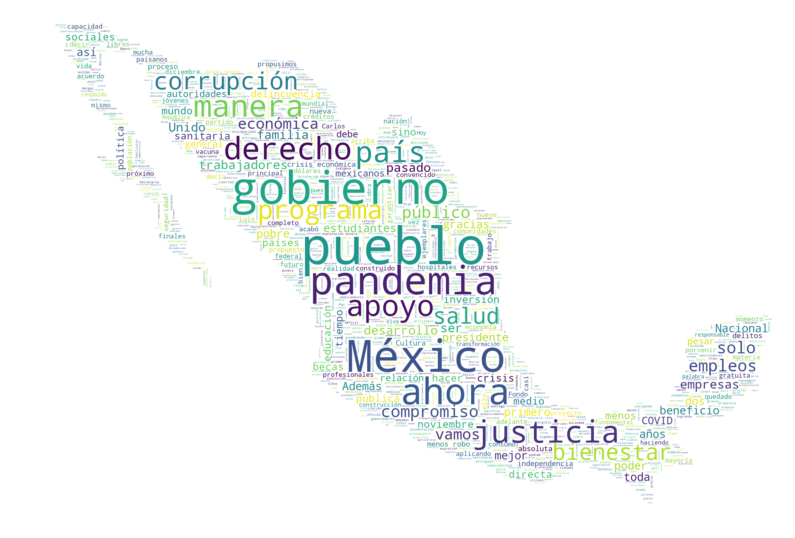

In [13]:
fig_mx = plt.figure()
fig_mx.set_figwidth(14) # set width
fig_mx.set_figheight(18) # set height


plt.imshow(amlo_wc_mx, interpolation='bilinear')
plt.axis('off')
plt.show()